# LEAD SCORE CASE STUDY

### PROBLEM STATEMENT

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. **The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**

### CASE STUDY OBJECTIVE :

Build a **logistic regression model** to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## 1. DATA INSPECTION

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

#### Importing the dataset

In [2]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Inspecting the Dataset

In [3]:
leads.shape

(9240, 37)

#### Note: This dataset has 9240 rows , 37 columns .

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Checking for Duplicates

In [6]:
leads.duplicated().sum()

0

#### Note: This shows that we dont have any duplicate values in our dataset

## 2. DATA CLEANING

#### Taking a look at all unique values for every column to check for abnormalities/inconsistencies

In [7]:
for col in leads.columns[2:]:
    print(col.upper(), end=': ')
    print(leads[col].unique())
    print()

LEAD ORIGIN: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

LEAD SOURCE: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

DO NOT EMAIL: ['No' 'Yes']

DO NOT CALL: ['No' 'Yes']

CONVERTED: [0 1]

TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

TOTAL TIME SPENT ON WEBSITE: [   0  674 1532 ...  603  483  927]

PAGE VIEWS PER VISIT: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 1

#### Issues observed through the column values:

- `LEAD SOURCE`-> **WeLearn** and **WeLearnblog_home** are one and the same. **Facebook** and **Social Media** are separated as two different categories.
- `COUNTRY`   -> **the Asian Countries** and **Asia/Pacific Region** are two different categories which is Ambiguous.

- `TAGS`      -> **invalid number** and **wrong number** given are one and the same.

- `LAST ACTIVITY` and `LAST NOTABLE ACTIVITY` are highly correlated. One of them should be dropped to avoid multi-collinearity.

#### Other potential issues:

- Many columns exist with only a single category (Redundant columns).
- Same category percieved as different due to not matching case. (ex. Google -> google)
- The value Select is equivalent to NaN.
- Possible overlaps may exist in City column.

#### Converting all the values to lower case so that same category names can be treated under a single label

In [8]:
leads = leads.applymap(lambda x:x.lower() if type(x)==str else x)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


##### Note: For columns like `Specialization` , `How did you hear about us` etc. we see that `Select` is specified as category , however, here `Select` is equivalent to `no option selected` . Hence, replacing select with NaN.

In [9]:
leads = leads.replace('select','NaN')

In [10]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


#### Checking the total number of unique values in each column

In [11]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [12]:
leads.Magazine.value_counts()

no    9240
Name: Magazine, dtype: int64

#### Dropping unique valued columns from above list

In [13]:
leads = leads.drop(['Receive More Updates About Our Courses','I agree to pay the amount through cheque',
                    'Get updates on DM Content','Update me on Supply Chain Content','Magazine'],axis=1)
leads.shape

(9240, 32)

**Note:** Earlier we had 37 columns, here after deleting 5 columns we are left with 32 columns. That confirms that the columns with unique value count = 1, were deleted. `Magazine` was deleted as the only value that it had was a `NO` which had no effect on the target variable.

#### Inspecting the missing values

In [14]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

#### Removing those columns that have more than 30% null values

In [15]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [16]:
leads = leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index',
                    'Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','City','Tags','Lead Profile'],axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


**Note:** Columns Dropped:

- `Asymmetrique Profile Index`,
- `Asymmetrique Activity Index`,
- `Asymmetrique Activity Score`,
- `Asymmetrique Profile Score`,
- `Lead Quality`
- `Magazine`
- `City`
- `Tags`
- `Lead Profile`

Earlier we had 33 columns, here after dropping 9 columns , we are left with 24 columns in total.

In [17]:
leads.shape

(9240, 24)

#### Dropping irrelevant columns

In [18]:
leads = leads.drop(['A free copy of Mastering The Interview','Last Notable Activity','Lead Number'],axis=1)

**Note:** Columns dropped:
    
- `A free copy of Mastering The Interview`
- `Last Notable Activity`
- `Lead Number`

Earlier we had 24 columns, after deleting 3 of the above columns we are left with 21 columns.

In [19]:
leads.shape

(9240, 21)

In [20]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,business administration,NaN,student,better career prospects,no,no,no,no,no,no
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,NaN,other,unemployed,better career prospects,no,no,no,no,no,no


#### Rechecking the percentage of missing values

In [21]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Values with frequency less than 30 are classified under "others" for the column Lead Source

In [22]:
value_counts = leads['Lead Source'].value_counts()
leads['Lead Source'] = leads['Lead Source'].replace(value_counts[value_counts < 30].index, "others")
leads['Lead Source'].value_counts()

google              2873
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
welingak website     142
referral sites       125
facebook              55
others                23
Name: Lead Source, dtype: int64

#### Inspecting the Country column

In [23]:
leads["Country"].value_counts()

india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [24]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "unknown":
        category = "unknown"
    else:
        category = "outside india"
    return category

leads['Country'] = leads.apply(lambda x:slots(x['Country']), axis = 1)
leads['Country'].value_counts()

india            6492
outside india    2743
unknown             5
Name: Country, dtype: int64

#### Imputing the missing values

In [25]:
leads['Specialization'] = leads['Specialization'].fillna('not provided')
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('not provided')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('not provided')
leads['How did you hear about X Education']=leads['How did you hear about X Education'].fillna('not provided')
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,business administration,NaN,student,better career prospects,no,no,no,no,no,no
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,NaN,other,unemployed,better career prospects,no,no,no,no,no,no


#### Rechecking the percentage of missing values

In [26]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [27]:
# Checking the percent of lose if the null values are removed
round(100*(sum(leads.isnull().sum(axis=1) > 1)/leads.shape[0]),2)

1.48

In [28]:
# Copying those columns where the null values are < 1 or =0
leads_new = leads[leads.isnull().sum(axis=1) <1]

In [29]:
# Code for checking number of rows left in percent
round(100*(leads_new.shape[0])/(leads.shape[0]),2)

98.2

In [30]:
# Rechecking the percentage of missing values
round(100*(leads_new.isnull().sum()/len(leads_new.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

#### Outlier Treatment

In [31]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads_new.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

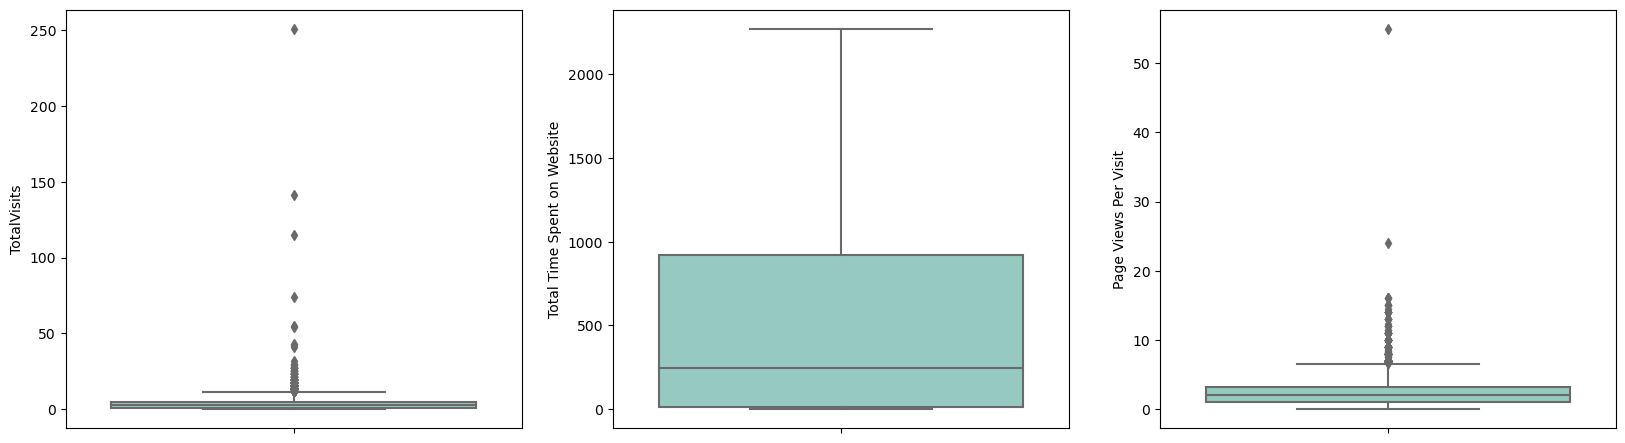

In [32]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leads_new)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leads_new)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leads_new)
plt.show()

In [33]:
# Removing values beyond 99% for Total Visits

outlier_total_visits = leads_new['TotalVisits'].quantile(0.99)
leads_new = leads_new[leads_new["TotalVisits"] < outlier_total_visits]
leads_new["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8975.000000
mean        3.192535
std         2.934948
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [34]:
# Checking outliers at 25%,50%,75%,90%,95% and above

leads_new.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8975.000000,8975.000000,8975.000000,8975.000000
mean,0.378496,3.192535,481.180724,2.341840
std,0.485039,2.934948,545.041857,2.060971
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,8.500000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
90%,1.000000,7.000000,1372.000000,5.000000
95%,1.000000,9.000000,1556.000000,6.000000
99%,1.000000,13.000000,1837.520000,9.000000


In [35]:
# Removing values beyond 99% for page Views Per Visit

outlier_page_visits = leads_new['Page Views Per Visit'].quantile(0.99)
leads_new = leads_new[leads_new["Page Views Per Visit"] < outlier_page_visits]
leads_new["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8863.000000
mean        2.236941
std         1.835885
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [36]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads_new.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8863.000000,8863.000000,8863.000000,8863.000000
mean,0.378089,3.098387,478.122193,2.236941
std,0.484937,2.821961,544.532372,1.835885
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,1.000000
50%,0.000000,3.000000,240.000000,2.000000
75%,1.000000,4.000000,913.000000,3.000000
90%,1.000000,7.000000,1371.000000,5.000000
95%,1.000000,8.000000,1553.000000,6.000000
99%,1.000000,13.000000,1837.760000,7.000000


In [37]:
# Determine the percentage of data retained

data_retained = round(100*(len(leads_new)/9240),2)
print(data_retained)

95.92


At this point, the data has been cleaned and around 98% of data has been retained

## 3. DATA ANALYSIS

A sneak peak into the data to understand the effect of each column on the conversion rate(target variable)

### Conversion Rate

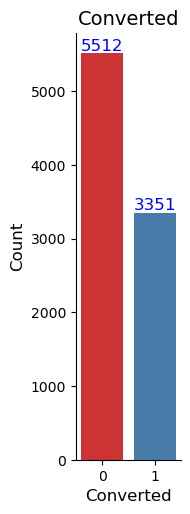

In [38]:
plot = sns.catplot(x="Converted", kind="count", data=leads_new, palette="Set1", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

##### Observation:
It can be inferred from the above graph that the overall conversion rate is 39%

### Analyzing the `Lead Origin` and the Conversion Rate from these origins

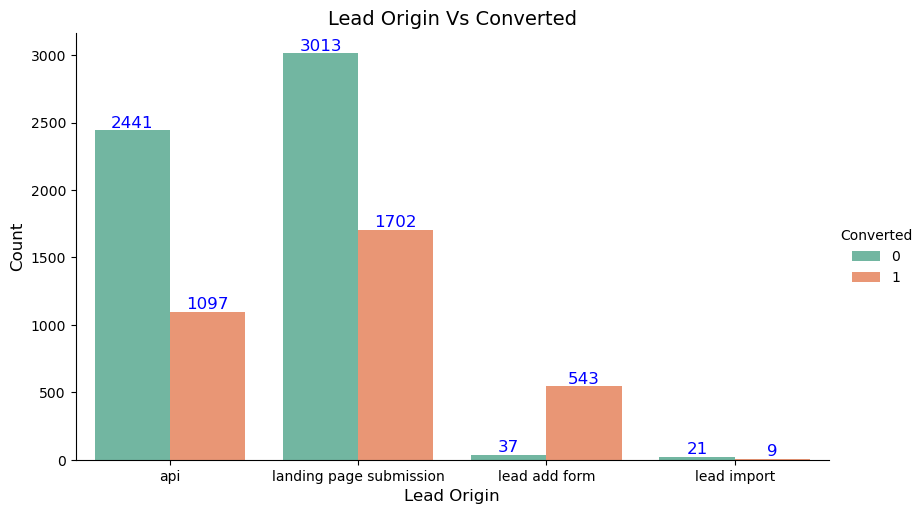

In [39]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leads_new, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

#### Observation:
From the above graph, it can be observed that landing page got the maximum conversion leads followed by api . This can be a good source to increase the leads in the future. 

### Analyzing the `Lead Source` and the Conversion Rate from these sources

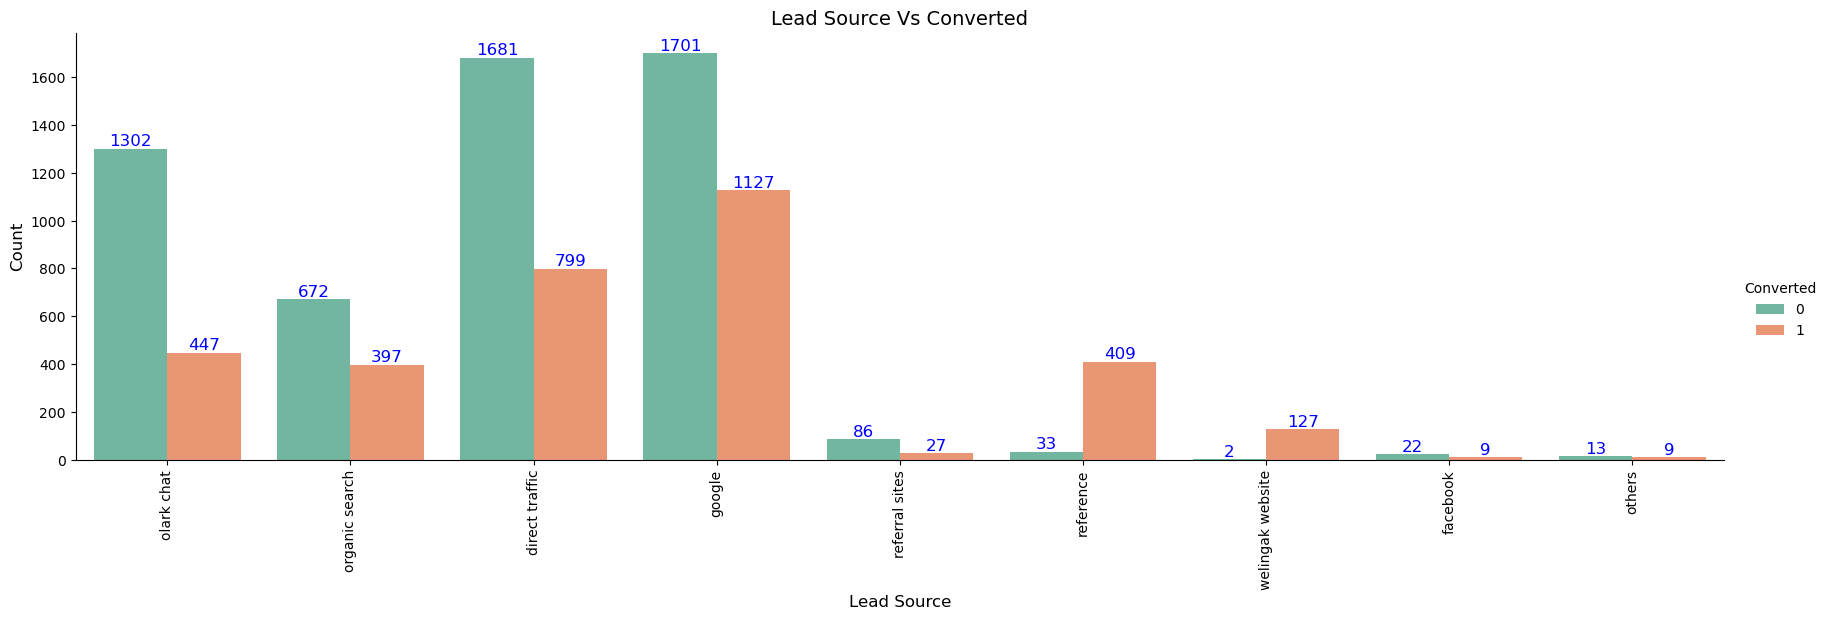

In [40]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leads_new, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
plt.show()

#### Observation: 
It can be observed that most of the conversion happened from Google followed by direct traffic. The source dark chat also has a conversion rate of about 25%. 

### Analyzing the `Do Not Email` column and the Conversion Rate

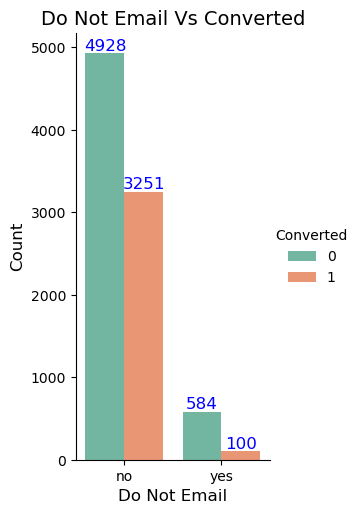

In [41]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leads_new, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

##### Observation:
It is interesting to note that the people who opted out of email subscription have a higher conversion rate than the one who opted in.

### Analyzing the `Do Not Call` and the Conversion Rate

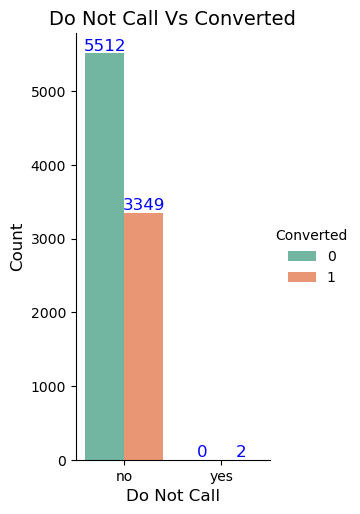

In [42]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=leads_new, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

### Analyzing the `Last Activity` column and the Conversion Rate

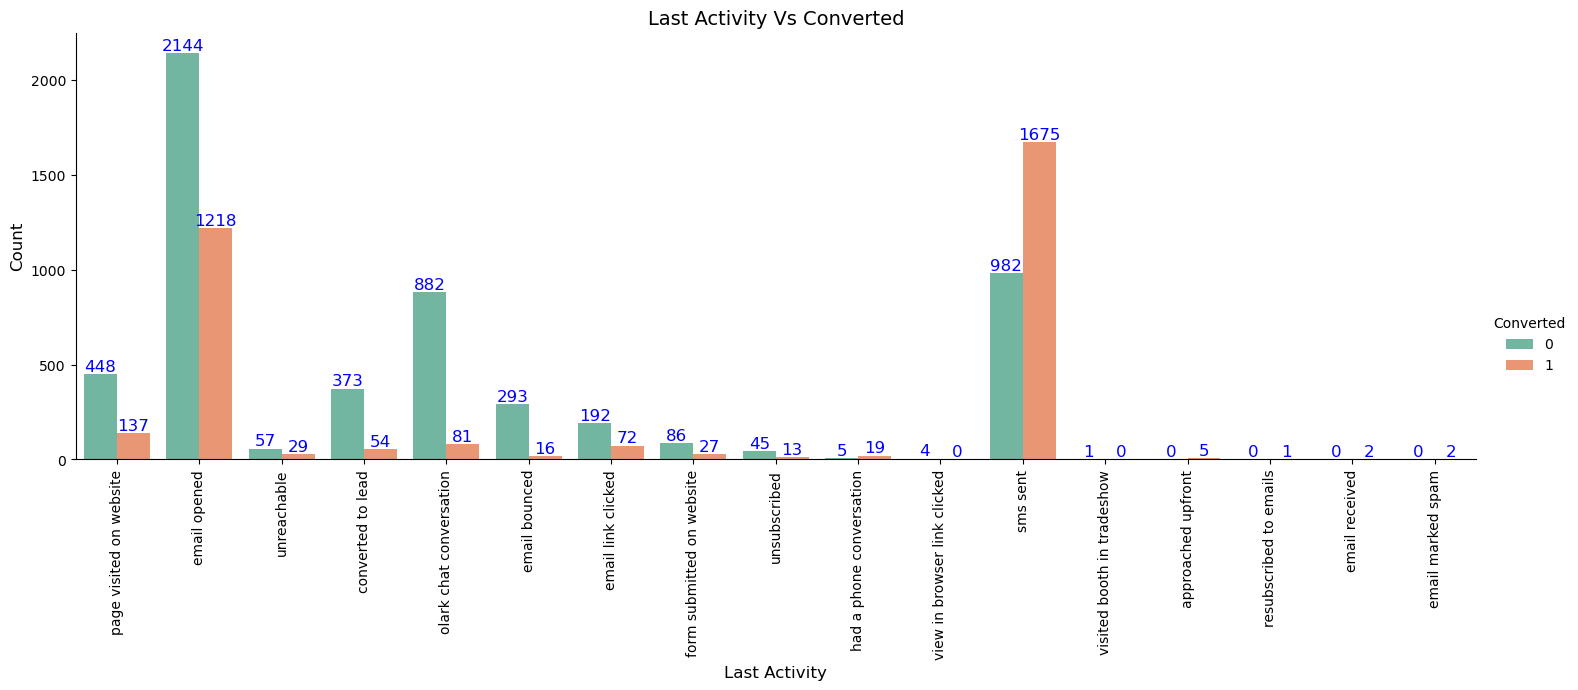

In [43]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leads_new, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

##### Observation:
The activities `Email Opened` and `SMS sent` have a very high conversion rate as compared to other activities.

### Analyzing the column `What is your current occupation` and the Conversion Rate

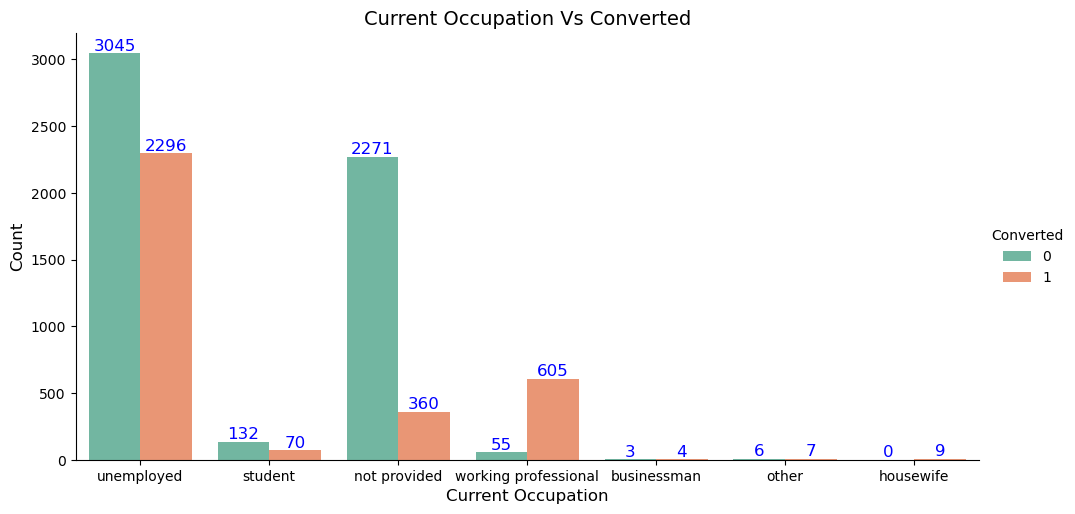

In [44]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leads_new, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()


##### Observation:
The `Working professionals` have a very high conversion rate, this can be a targetted group for future conversions.

### Analyzing the `Search` column and the Conversion Rate

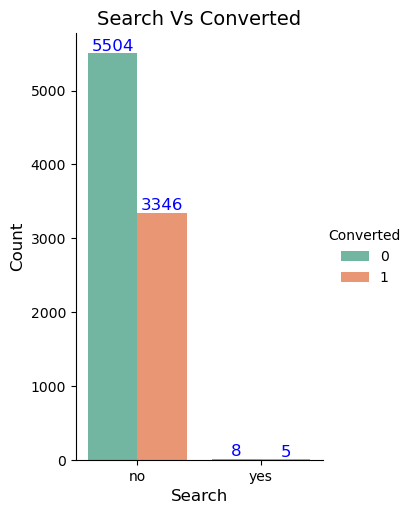

In [45]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=leads_new, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### Observation:
Search is also a very good source for higher conversions, the company can focus upon promotional ads to increase the conversion rates.

### Analyzing the column `Newspaper Article` and the Conversion Rate

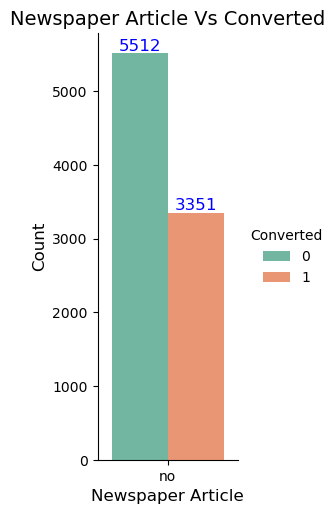

In [46]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=leads_new, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

##### Observation:
From the graph it can be seen that the column "Newspaper Article" has only one value for all rows - "No" , it is safe to drop this column

In [47]:
# Dropping Newspaper Article

leads_new = leads_new.drop(['Newspaper Article'], axis=1)

### Analyzing the column `X Education Forums` and the Conversion Rate

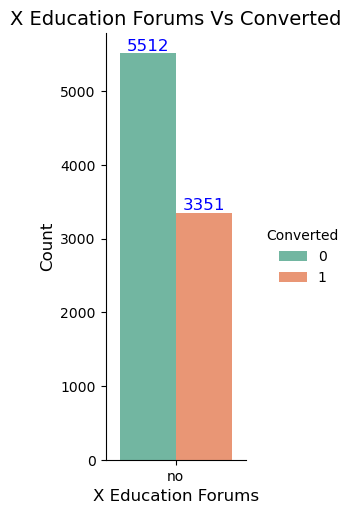

In [48]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=leads_new, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### Observation:
From the graph it can be seen that the column "X Education Forum" has only one value for all rows - "No" , it is safe to drop this column

In [49]:
# Dropping X Education Forum column

leads_new = leads_new.drop(['X Education Forums'], axis=1)

### Analyzing the column `Newspaper` and the Conversion Rate

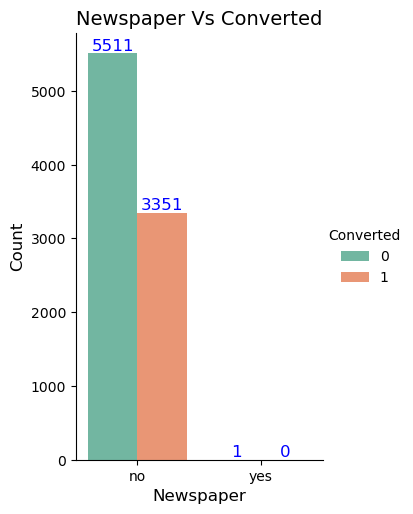

In [50]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leads_new, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

#### Observation:
Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [51]:
# Dropping Newspaper column

leads_new = leads_new.drop(['Newspaper'], axis=1)

### Analyzing the column `Digital Advertisement` and the Conversion Rate

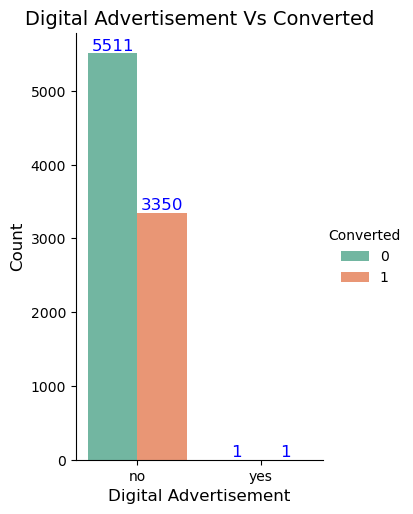

In [52]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leads_new, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

### Analyzing the column `Through Recommendations` and the Conversion Rate

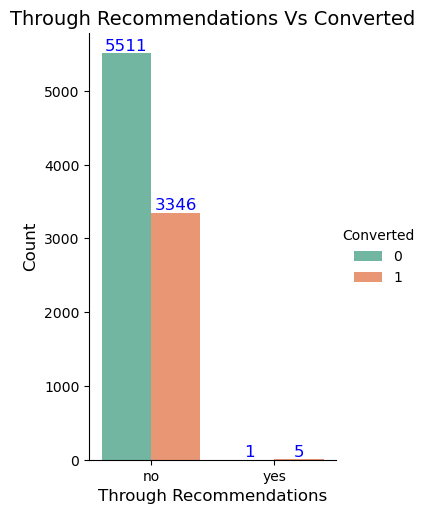

In [53]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=leads_new, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

### Analyzing the column `Country` and the Conversion Rate

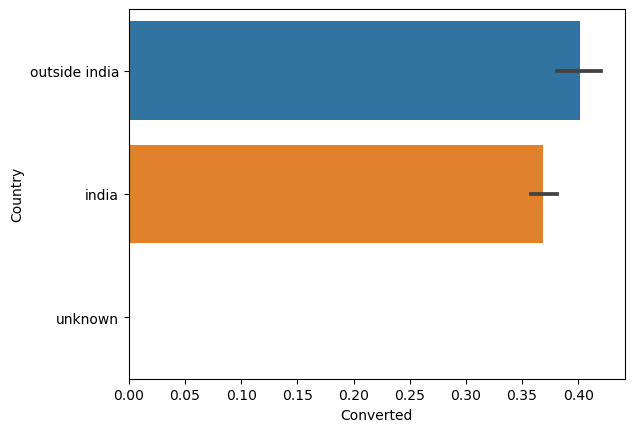

In [54]:
sns.barplot(y = 'Country', x='Converted', data = leads_new)
plt.show()

##### Observation:
It is interesting to note that the conversion rate outside India is also very good.

### Checking the conversions for all numeric values

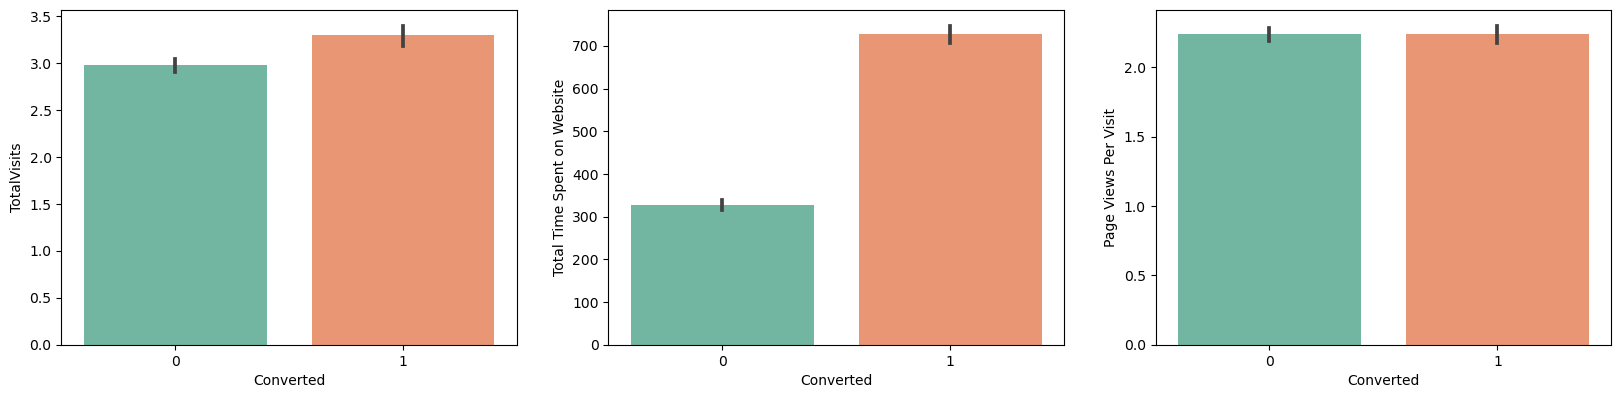

In [55]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads_new)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads_new)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads_new)
plt.show()

#### Observation: 
It can be seen that more time the visitors spend on the website, higher the conversion chances are. The company can develop the website in such a way that the visitors spend time to browse more about the courses.

In [56]:
leads_new.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Digital Advertisement,Through Recommendations
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,outside india,NaN,NaN,unemployed,better career prospects,no,no,no
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,india,NaN,NaN,unemployed,better career prospects,no,no,no
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,NaN,student,better career prospects,no,no,no
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,NaN,other,unemployed,better career prospects,no,no,no


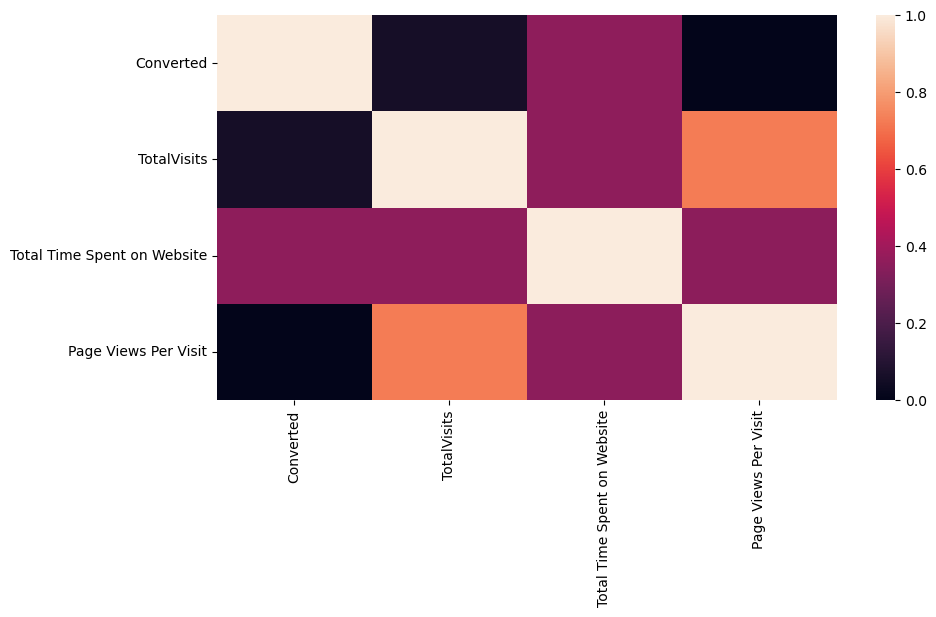

In [57]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads_new.corr())
plt.show()

##### Observation:
As observed in the above numeric graph ,more time the visitors spend on the website, higher the conversion chances are.

## 4. DATA PREPARATION

### Create Dummy Varibales

Converting Binary variables Yes and No to 0 and 1

In [58]:
var_list =  var_list =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations']

# Using the map function for conversion
def conversion_map(x):
    return x.map({'Yes': 1, "No": 0})

# Apply the map function to the columns
leads_new[var_list] = leads_new[var_list].apply(conversion_map)

In [59]:
# Creating dummies for below columns

dummy_var = pd.get_dummies(leads_new[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 
                                 'Last Activity', 'What is your current occupation']], drop_first=True)

# Add the results to the master dataframel
leads_final = pd.concat([leads_new, dummy_var], axis=1)
leads_final

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,NaN,NaN,0,0.0,0,0.00,page visited on website,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,NaN,NaN,0,5.0,674,2.50,email opened,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,NaN,NaN,1,2.0,1532,2.00,email opened,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,NaN,NaN,0,1.0,305,1.00,unreachable,...,1,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,NaN,NaN,1,2.0,1428,1.00,converted to lead,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,landing page submission,direct traffic,NaN,NaN,1,8.0,1845,2.67,email marked spam,...,0,0,0,0,0,0,0,0,1,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,landing page submission,direct traffic,NaN,NaN,0,2.0,238,2.00,sms sent,...,0,0,0,0,0,0,0,0,1,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,landing page submission,direct traffic,NaN,NaN,0,2.0,199,2.00,sms sent,...,0,0,0,0,0,0,0,0,1,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,landing page submission,google,NaN,NaN,1,3.0,499,3.00,sms sent,...,0,0,0,0,0,1,0,0,0,0


In [60]:
leads_final.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Digital Advertisement', 'Through Recommendations', 'Do Not Email',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it project

In [61]:
# drop the columns
leads_final = leads_final.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 
                                  'Do Not Email', 'Do Not Call', 'Country', 'Specialization', 
                                  'Specialization_not provided','What is your current occupation',
                                  'What matters most to you in choosing a course', 'Search', 'Last Activity',
                                  'Digital Advertisement', 'Through Recommendations','How did you hear about X Education','Prospect ID'], 1)
leads_final

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,...,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## 5. TEST TRAIN SPLIT

In [62]:
# Import the library
from sklearn.model_selection import train_test_split

In [63]:
X = leads_final.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
# Put target variable in y
y = leads_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Split data set in 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [66]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
7215,0.1250,0.703785,0.1250,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8445,0.1250,0.654049,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3679,0.1250,0.503081,0.2500,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5447,0.0625,0.303257,0.1250,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6731,0.5625,0.030370,0.5625,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


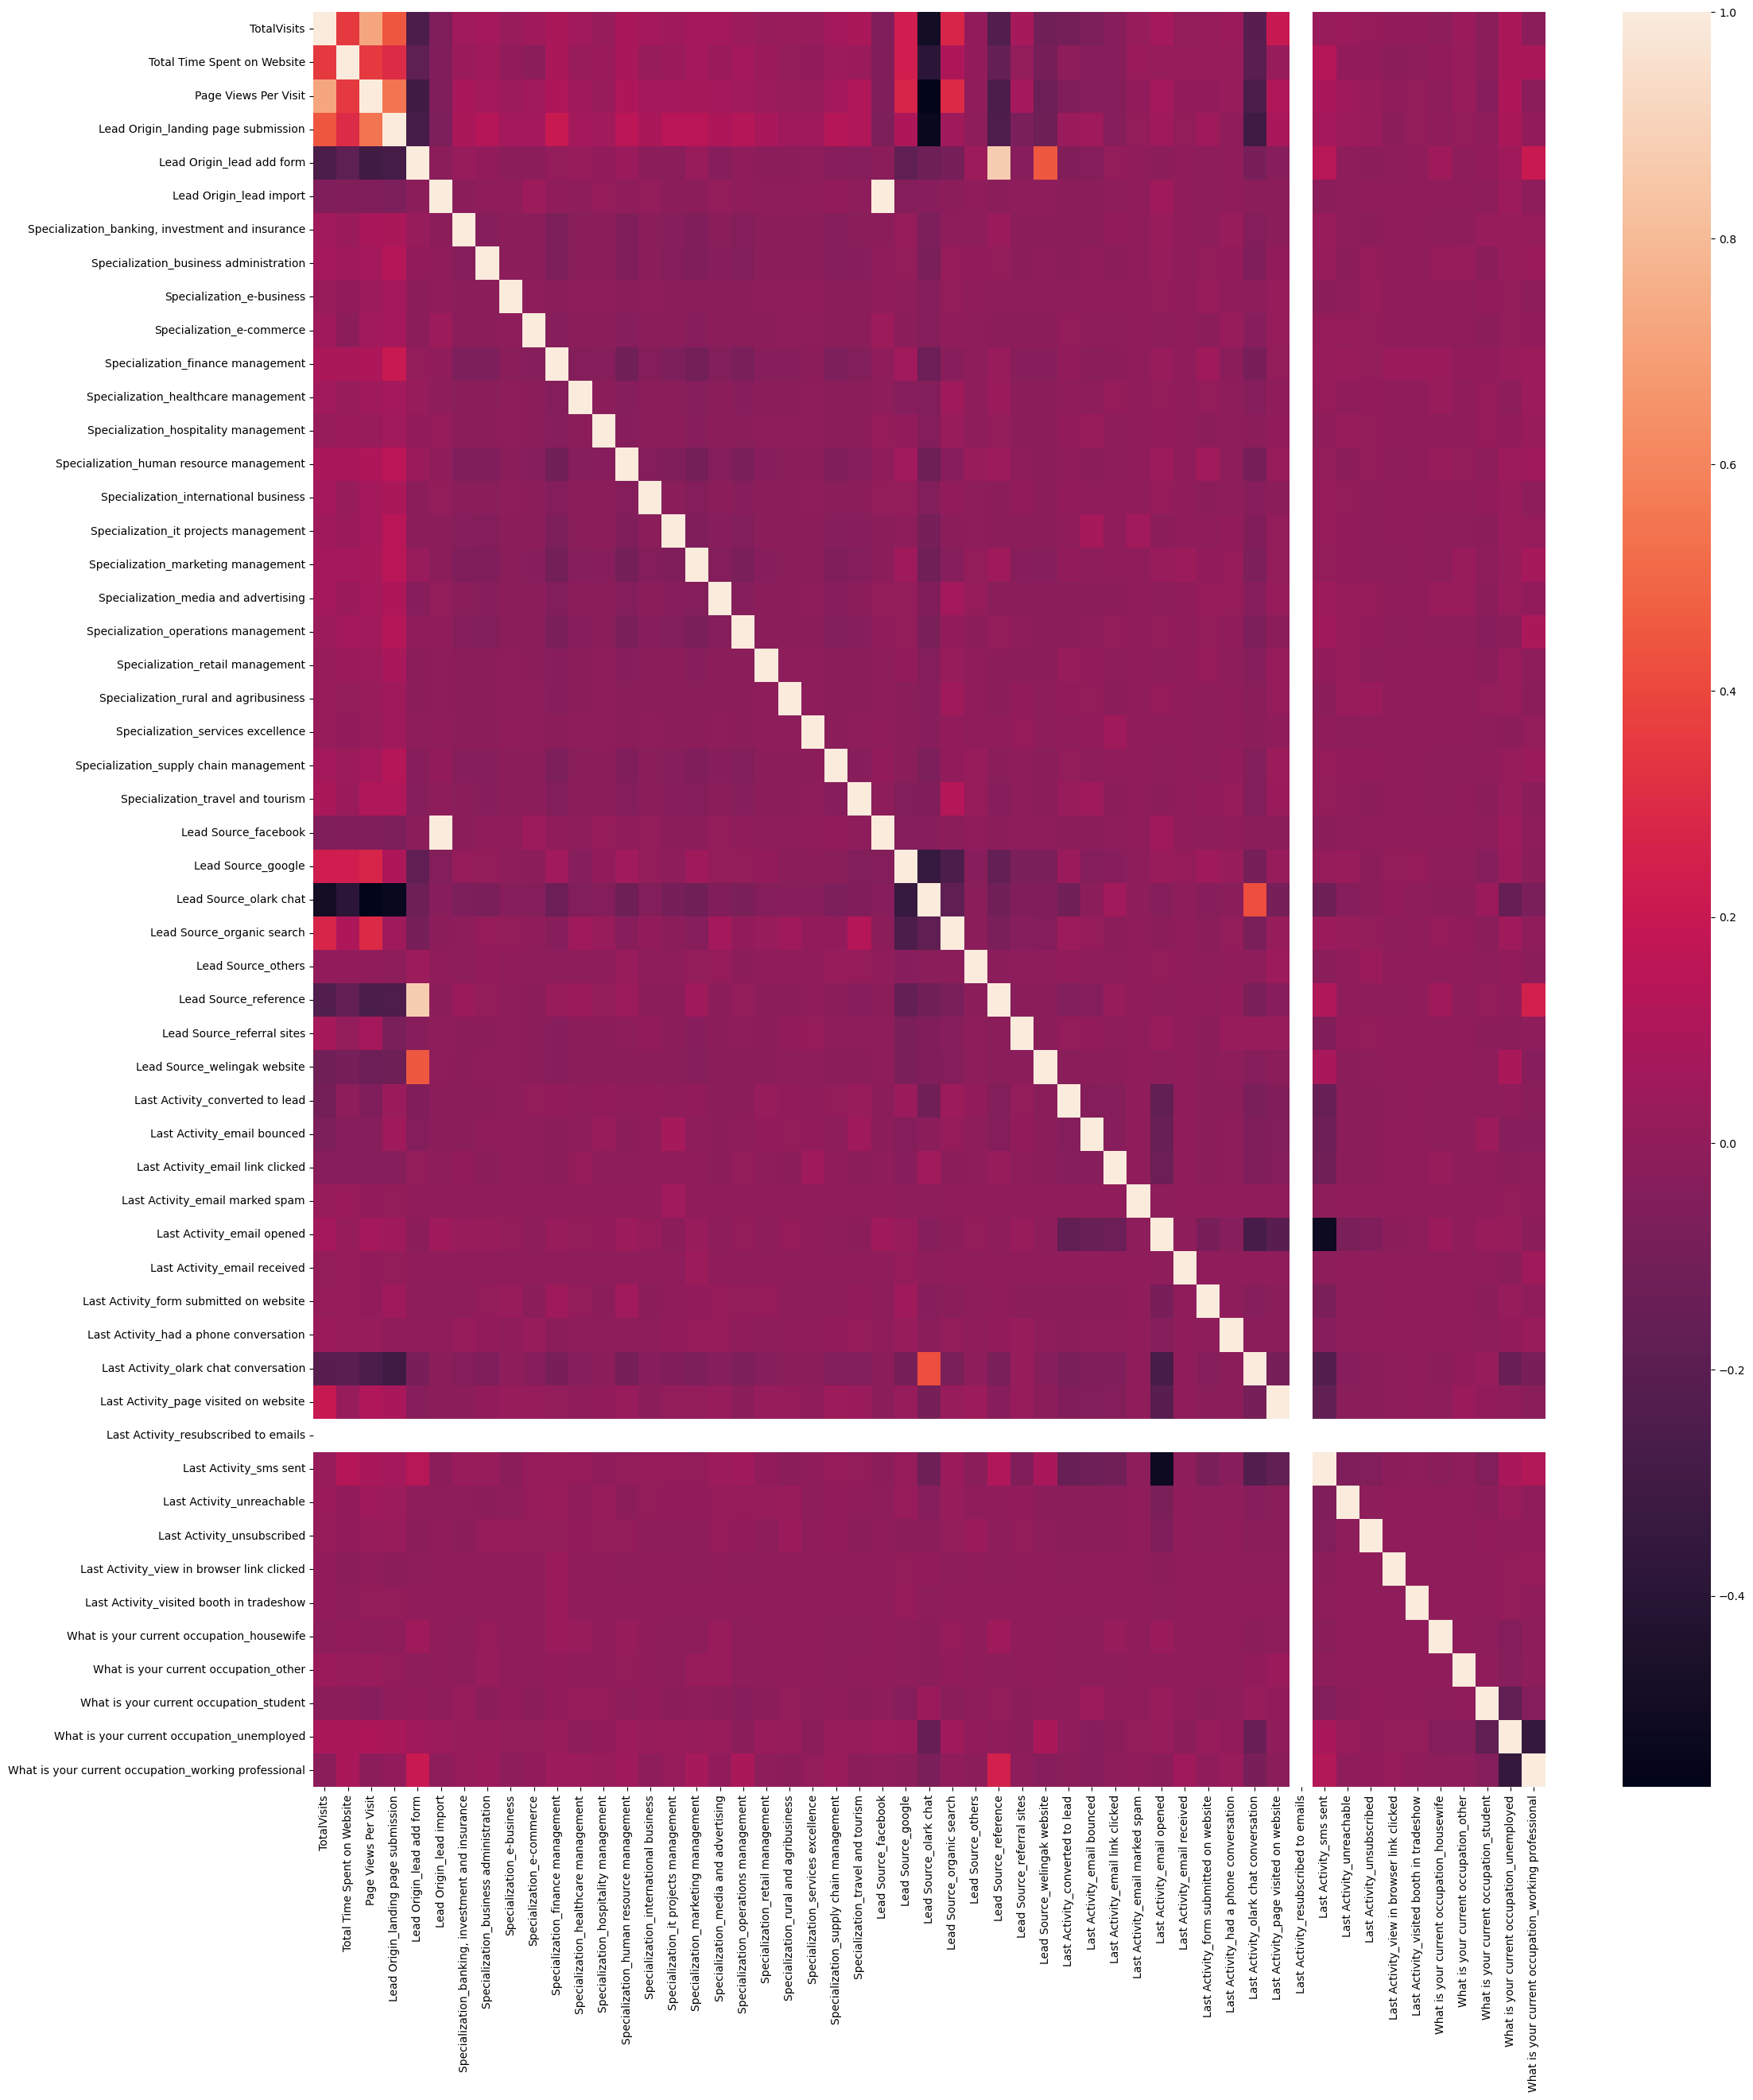

In [67]:
# To check the correlation among varibles

plt.figure(figsize=(25,29))
sns.heatmap(X_train.corr())
plt.show()

In [68]:
# checking the info
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8863 non-null   int64  
 1   TotalVisits                                           8863 non-null   float64
 2   Total Time Spent on Website                           8863 non-null   int64  
 3   Page Views Per Visit                                  8863 non-null   float64
 4   Lead Origin_landing page submission                   8863 non-null   uint8  
 5   Lead Origin_lead add form                             8863 non-null   uint8  
 6   Lead Origin_lead import                               8863 non-null   uint8  
 7   Specialization_banking, investment and insurance      8863 non-null   uint8  
 8   Specialization_business administration                8863

## 6. BUILDING MODEL

In [69]:
# Importing 'LogisticRegression' library
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [70]:
# Import RFE from sklearn
from sklearn.feature_selection import RFE

In [71]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_retail management',
       'Specialization_rural and agribusiness',
       'Specialization_services excellence',
       'Specialization_supply chain management',
       'Specialization_travel and tou

In [74]:
# Run RFE with 15 var as output

rfe = RFE(estimator = log_reg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [75]:
# Features selected by RFE into list

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_landing page submission', False, 5),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 30),
 ('Specialization_banking, investment and insurance', False, 7),
 ('Specialization_business administration', False, 17),
 ('Specialization_e-business', False, 16),
 ('Specialization_e-commerce', False, 9),
 ('Specialization_finance management', False, 10),
 ('Specialization_healthcare management', False, 20),
 ('Specialization_hospitality management', False, 33),
 ('Specialization_human resource management', False, 14),
 ('Specialization_international business', False, 13),
 ('Specialization_it projects management', False, 12),
 ('Specialization_marketing management', False, 8),
 ('Specialization_media and advertising', False, 18),
 ('Specialization_operations management', False, 11),
 ('Specialization_retail management', False, 34),
 ('Specializati

In [76]:
# taking columns selected by RFE in the variable 'cols'
cols = X_train.columns[rfe.support_]

In [77]:
# Importing statsmodels
import statsmodels.api as sm

In [78]:
# Logistic regression model

X_train_sm = sm.add_constant(X_train)
logm_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res_ = logm_1.fit()
res_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6152
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2477.7
Date:                Wed, 11 Sep 2024   Deviance:                       4955.5
Time:                        21:21:26   Pearson chi2:                 6.26e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   19.9998   3.77e+04      0.001      1.000   -7.39e+04     7.4e+04
TotalVisits                                              1.8606      0.296      6.279      0.000       1.280       2.441
Total Time Spent on Website                              4.5450      0.175     25.969      0.000       4.202       4.888
Page Views Per Visit                                    -1.1225      0.253     -4.430      0.000      -1.619      -0.626
Lead Origin_landing page submission                     -1.0183      0.144     -7.088      0.000      -1.300      -0.737
Lead Origin_lead add form                               -0.5487      1.139     -0.482      0.630      -2.781       1.684
Lead Origin_lead import                                  0.0840      0.267      0.314      0.753      -0.440       0.608
Specialization_banking, investment and insurance         1.2139      0.218      5.562      0.000       0.786       1.642
Specialization_business administration                   0.8224      0.211      3.896      0.000       0.409       1.236
Specialization_e-business                                1.0921      0.465      2.349      0.019       0.181       2.003
Specialization_e-commerce                                1.1485      0.332      3.455      0.001       0.497       1.800
Specialization_finance management                        1.0274      0.166      6.187      0.000       0.702       1.353
Specialization_healthcare management                     0.7728      0.295      2.623      0.009       0.195       1.350
Specialization_hospitality management                    0.2546      0.348      0.732      0.464      -0.427       0.936
Specialization_human resource management                 0.8617      0.169      5.102      0.000       0.531       1.193
Specialization_international business                    0.8853      0.275      3.223      0.001       0.347       1.424
Specialization_it projects management                    1.0369      0.220      4.713      0.000       0.606       1.468
Specialization_marketing management                      1.1219      0.167      6.714      0.000       0.794       1.449
Specialization_media and advertising                     0.8180      0.258      3.171      0.002       0.312       1.323
Specialization_operations management                     0.9801      0.195      5.036      0.000       0.599       1.362
Specialization_retail management                         0.2705      0.376      0.720      0.472      -0.466       1.007
Specialization_rural and agribusiness                    1.3196      0.384      3.434      0.001       0.566       2.073
Specialization_services excellence                       1

In [79]:
# Import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Making a VIF df for all the var

vif_ = pd.DataFrame()
vif_['Features'] = X_train.columns
vif_['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_['VIF'] = round(vif_['VIF'], 2)
vif_ = vif_.sort_values(by = "VIF", ascending = False)
vif_

,Features,VIF
24,Lead Source_facebook,inf
5,Lead Origin_lead import,inf
4,Lead Origin_lead add form,104.81
29,Lead Source_reference,82.21
31,Lead Source_welingak website,23.44
3,Lead Origin_landing page submission,8.65
36,Last Activity_email opened,7.61
2,Page Views Per Visit,7.20
43,Last Activity_sms sent,6.64
0,TotalVisits,5.21


##### The VIF of the variable `Lead Source_facebook','Lead Origin_lead import` >5 i.e. inf , hence dropping them.

In [81]:
X_train.drop(['Lead Source_facebook','Lead Origin_lead import'], axis=1, inplace=True)

##### Refiting model with the new features

In [82]:
X_train_sm = sm.add_constant(X_train)
logm_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res_ = logm_2.fit()
res_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6153
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2477.8
Date:                Wed, 11 Sep 2024   Deviance:                       4955.6
Time:                        21:21:27   Pearson chi2:                 6.26e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.0107   3.77e+04      0.001      1.000   -7.39e+04    7.39e+04
TotalVisits                                              1.8556      0.296      6.272      0.000       1.276       2.435
Total Time Spent on Website                              4.5399      0.174     26.058      0.000       4.198       4.881
Page Views Per Visit                                    -1.1274      0.253     -4.457      0.000      -1.623      -0.632
Lead Origin_landing page submission                     -1.0267      0.141     -7.268      0.000      -1.304      -0.750
Lead Origin_lead add form                               -0.5564      1.139     -0.489      0.625      -2.788       1.676
Specialization_banking, investment and insurance         1.2178      0.218      5.588      0.000       0.791       1.645
Specialization_business administration                   0.8271      0.211      3.929      0.000       0.415       1.240
Specialization_e-business                                1.0958      0.465      2.358      0.018       0.185       2.007
Specialization_e-commerce                                1.1581      0.331      3.497      0.000       0.509       1.807
Specialization_finance management                        1.0320      0.165      6.238      0.000       0.708       1.356
Specialization_healthcare management                     0.7771      0.294      2.640      0.008       0.200       1.354
Specialization_hospitality management                    0.2627      0.347      0.757      0.449      -0.418       0.943
Specialization_human resource management                 0.8666      0.168      5.151      0.000       0.537       1.196
Specialization_international business                    0.8910      0.274      3.249      0.001       0.354       1.428
Specialization_it projects management                    1.0402      0.220      4.733      0.000       0.609       1.471
Specialization_marketing management                      1.1254      0.167      6.747      0.000       0.798       1.452
Specialization_media and advertising                     0.8236      0.257      3.200      0.001       0.319       1.328
Specialization_operations management                     0.9846      0.194      5.070      0.000       0.604       1.365
Specialization_retail management                         0.2747      0.375      0.732      0.464      -0.461       1.011
Specialization_rural and agribusiness                    1.3229      0.384      3.443      0.001       0.570       2.076
Specialization_services excellence                       1.0341      0.646      1.601      0.109      -0.232       2.301
Specialization_supply chain management                   0

In [83]:
# Making a VIF df for all the variables
vif_ = pd.DataFrame()
vif_['Features'] = X_train.columns
vif_['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_['VIF'] = round(vif_['VIF'], 2)
vif_ = vif_.sort_values(by = "VIF", ascending = False)
vif_

,Features,VIF
4,Lead Origin_lead add form,104.79
27,Lead Source_reference,82.20
29,Lead Source_welingak website,23.44
3,Lead Origin_landing page submission,8.44
34,Last Activity_email opened,7.28
2,Page Views Per Visit,7.18
41,Last Activity_sms sent,6.41
0,TotalVisits,5.19
24,Lead Source_olark chat,4.05
49,What is your current occupation_unemployed,3.36


##### The vif value of the feature `Lead Origin_lead add form` >5 i.e. 104.79 , hence dropping it

In [84]:
X_train.drop(['Lead Origin_lead add form'],axis=1, inplace=True)

##### Refiting model with the new features

In [85]:
X_train_sm = sm.add_constant(X_train)
logm_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res_ = logm_3.fit()
res_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6154
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2477.9
Date:                Wed, 11 Sep 2024   Deviance:                       4955.8
Time:                        21:21:29   Pearson chi2:                 6.26e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4121
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.0094   3.77e+04      0.001      1.000   -7.39e+04    7.39e+04
TotalVisits                                              1.8573      0.296      6.277      0.000       1.277       2.437
Total Time Spent on Website                              4.5406      0.174     26.063      0.000       4.199       4.882
Page Views Per Visit                                    -1.1247      0.253     -4.447      0.000      -1.620      -0.629
Lead Origin_landing page submission                     -1.0212      0.141     -7.254      0.000      -1.297      -0.745
Specialization_banking, investment and insurance         1.2129      0.218      5.573      0.000       0.786       1.639
Specialization_business administration                   0.8229      0.210      3.913      0.000       0.411       1.235
Specialization_e-business                                1.0903      0.464      2.347      0.019       0.180       2.001
Specialization_e-commerce                                1.1533      0.331      3.485      0.000       0.505       1.802
Specialization_finance management                        1.0258      0.165      6.220      0.000       0.703       1.349
Specialization_healthcare management                     0.7720      0.294      2.625      0.009       0.196       1.348
Specialization_hospitality management                    0.2580      0.347      0.744      0.457      -0.422       0.938
Specialization_human resource management                 0.8597      0.168      5.128      0.000       0.531       1.188
Specialization_international business                    0.8860      0.274      3.234      0.001       0.349       1.423
Specialization_it projects management                    1.0352      0.220      4.716      0.000       0.605       1.465
Specialization_marketing management                      1.1194      0.166      6.731      0.000       0.793       1.445
Specialization_media and advertising                     0.8200      0.257      3.188      0.001       0.316       1.324
Specialization_operations management                     0.9796      0.194      5.053      0.000       0.600       1.360
Specialization_retail management                         0.2697      0.375      0.719      0.472      -0.466       1.005
Specialization_rural and agribusiness                    1.3184      0.384      3.434      0.001       0.566       2.071
Specialization_services excellence                       1.0290      0.646      1.593      0.111      -0.237       2.295
Specialization_supply chain management                   0.9113      0.218      4.172      0.000       0.483       1.339
Specialization_travel and tourism                        0

In [86]:
# Rechecking the VIF values for all the variables
vif_ = pd.DataFrame()
vif_['Features'] = X_train.columns
vif_['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_['VIF'] = round(vif_['VIF'], 2)
vif_ = vif_.sort_values(by = "VIF", ascending = False)
vif_

,Features,VIF
3,Lead Origin_landing page submission,8.40
33,Last Activity_email opened,7.28
2,Page Views Per Visit,7.18
40,Last Activity_sms sent,6.41
0,TotalVisits,5.19
23,Lead Source_olark chat,4.05
48,What is your current occupation_unemployed,3.36
37,Last Activity_olark chat conversation,2.82
22,Lead Source_google,2.57
1,Total Time Spent on Website,2.39


###### The VIF of the variable `Lead Origin_landing page submission` >5 i.e. 8.40 , hence dropping it.

In [87]:
X_train.drop('Lead Origin_landing page submission', axis = 1, inplace = True)

In [88]:
# Refitting model with the new features
X_train_sm = sm.add_constant(X_train)
logm_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res_ = logm_4.fit()
res_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6155
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2504.9
Date:                Wed, 11 Sep 2024   Deviance:                       5009.8
Time:                        21:21:30   Pearson chi2:                 6.21e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4070
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   19.5589   3.78e+04      0.001      1.000   -7.41e+04    7.41e+04
TotalVisits                                              1.8228      0.294      6.198      0.000       1.246       2.399
Total Time Spent on Website                              4.5795      0.174     26.369      0.000       4.239       4.920
Page Views Per Visit                                    -1.3416      0.251     -5.337      0.000      -1.834      -0.849
Specialization_banking, investment and insurance         0.6131      0.197      3.111      0.002       0.227       0.999
Specialization_business administration                   0.1941      0.190      1.020      0.308      -0.179       0.567
Specialization_e-business                                0.4100      0.454      0.902      0.367      -0.481       1.301
Specialization_e-commerce                                0.5859      0.317      1.850      0.064      -0.035       1.207
Specialization_finance management                        0.3844      0.138      2.787      0.005       0.114       0.655
Specialization_healthcare management                     0.1680      0.278      0.604      0.546      -0.377       0.713
Specialization_hospitality management                   -0.3508      0.337     -1.042      0.298      -1.011       0.309
Specialization_human resource management                 0.2502      0.143      1.751      0.080      -0.030       0.530
Specialization_international business                    0.2822      0.260      1.087      0.277      -0.227       0.791
Specialization_it projects management                    0.4154      0.201      2.066      0.039       0.021       0.809
Specialization_marketing management                      0.5319      0.143      3.727      0.000       0.252       0.812
Specialization_media and advertising                     0.1580      0.240      0.658      0.511      -0.313       0.629
Specialization_operations management                     0.3466      0.171      2.023      0.043       0.011       0.682
Specialization_retail management                        -0.3980      0.359     -1.107      0.268      -1.103       0.307
Specialization_rural and agribusiness                    0.7298      0.366      1.996      0.046       0.013       1.446
Specialization_services excellence                       0.4116      0.649      0.634      0.526      -0.860       1.684
Specialization_supply chain management                   0.2874      0.200      1.440      0.150      -0.104       0.679
Specialization_travel and tourism                        0.2529      0.254      0.996      0.319      -0.245       0.751
Lead Source_google                                       0

In [89]:
#Rechecking the vif values for all the variables
vif_ = pd.DataFrame()
vif_['Features'] = X_train.columns
vif_['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_['VIF'] = round(vif_['VIF'], 2)
vif_ = vif_.sort_values(by = "VIF", ascending = False)
vif_

,Features,VIF
2,Page Views Per Visit,7.04
32,Last Activity_email opened,6.56
39,Last Activity_sms sent,5.74
0,TotalVisits,5.19
22,Lead Source_olark chat,3.51
47,What is your current occupation_unemployed,3.33
36,Last Activity_olark chat conversation,2.62
1,Total Time Spent on Website,2.39
21,Lead Source_google,2.38
37,Last Activity_page visited on website,2.00


##### The VIF of the variable `Page Views Per Visit','Last Activity_email opened` >5 i.e. 7.04,6.05 , hence dropping them.

In [90]:
X_train.drop(['Page Views Per Visit','Last Activity_email opened'], axis=1, inplace=True)

#### Refitting the model

In [91]:
X_train_sm = sm.add_constant(X_train)
logm_5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res_ = logm_5.fit()
res_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6157
Model Family:                Binomial   Df Model:                           46
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2521.5
Date:                Wed, 11 Sep 2024   Deviance:                       5042.9
Time:                        21:21:32   Pearson chi2:                 6.20e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4038
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9427      0.158    -24.985      0.000      -4.252      -3.633
TotalVisits                                              1.1360      0.263      4.320      0.000       0.621       1.651
Total Time Spent on Website                              4.5859      0.173     26.471      0.000       4.246       4.925
Specialization_banking, investment and insurance         0.4788      0.195      2.455      0.014       0.097       0.861
Specialization_business administration                   0.0995      0.189      0.527      0.599      -0.271       0.470
Specialization_e-business                                0.2447      0.455      0.537      0.591      -0.648       1.137
Specialization_e-commerce                                0.4713      0.315      1.496      0.135      -0.146       1.089
Specialization_finance management                        0.2945      0.136      2.158      0.031       0.027       0.562
Specialization_healthcare management                     0.0468      0.273      0.171      0.864      -0.488       0.582
Specialization_hospitality management                   -0.4082      0.335     -1.217      0.224      -1.066       0.249
Specialization_human resource management                 0.1460      0.141      1.036      0.300      -0.130       0.422
Specialization_international business                    0.1776      0.257      0.692      0.489      -0.325       0.681
Specialization_it projects management                    0.3280      0.200      1.640      0.101      -0.064       0.720
Specialization_marketing management                      0.4441      0.141      3.149      0.002       0.168       0.721
Specialization_media and advertising                     0.0631      0.239      0.264      0.792      -0.406       0.532
Specialization_operations management                     0.2626      0.170      1.541      0.123      -0.071       0.597
Specialization_retail management                        -0.4674      0.357     -1.308      0.191      -1.168       0.233
Specialization_rural and agribusiness                    0.6460      0.365      1.770      0.077      -0.070       1.362
Specialization_services excellence                       0.3680      0.641      0.574      0.566      -0.889       1.625
Specialization_supply chain management                   0.1979      0.197      1.004      0.315      -0.188       0.584
Specialization_travel and tourism                        0.1118      0.251      0.445      0.656      -0.380       0.604
Lead Source_google                                       0.4023      0.092      4.353      0.000       0.221       0.583
Lead Source_olark chat                                   2

In [92]:
#Rechecking the vif values for the current features
vif_ = pd.DataFrame()
vif_['Features'] = X_train.columns
vif_['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_['VIF'] = round(vif_['VIF'], 2)
vif_ = vif_.sort_values(by = "VIF", ascending = False)
vif_

,Features,VIF
0,TotalVisits,3.68
45,What is your current occupation_unemployed,2.98
1,Total Time Spent on Website,2.29
20,Lead Source_google,1.90
37,Last Activity_sms sent,1.76
21,Lead Source_olark chat,1.68
46,What is your current occupation_working profes...,1.51
22,Lead Source_organic search,1.49
34,Last Activity_olark chat conversation,1.47
6,Specialization_finance management,1.45


##### All the features have vif<5 , hence keeping all of them and proceeding to the model prediction step.

## 7. MAKING PREDICTIONS

In [93]:
# Predict the probability 
y_train_predicted = res_.predict(X_train_sm)
y_train_predicted[:10]

7215    0.992210
8445    0.653288
3679    0.819048
5447    0.868918
6731    0.340530
3357    0.045453
3310    0.828854
3160    0.050620
7224    0.245582
2876    0.314055
dtype: float64

In [94]:
# Reshape the prediction
y_train_predicted = y_train_predicted.values.reshape(-1)
y_train_predicted[:10]

array([0.99221029, 0.65328789, 0.81904823, 0.86891848, 0.34052964,
       0.04545262, 0.82885429, 0.05062002, 0.24558169, 0.31405451])

In [95]:
# Dataframe with given convertion rate and probablity of predicted ones
y_train_predicted_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_predicted})
y_train_predicted_final.head(10)

,Converted,Conversion_Probability
0,1,0.992210
1,1,0.653288
2,1,0.819048
3,0,0.868918
4,0,0.340530
5,0,0.045453
6,1,0.828854
7,0,0.050620
8,0,0.245582
9,0,0.314055


In [96]:
# Substitute 0 and 1 in Predicted with probability cut off of 0.5

y_train_predicted_final['Predicted'] = y_train_predicted_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_predicted_final.head()

,Converted,Conversion_Probability,Predicted
0,1,0.992210,1
1,1,0.653288,1
2,1,0.819048,1
3,0,0.868918,1
4,0,0.340530,0


## 8. MODEL EVALUATION

In [97]:
# Import metrics from sklearn
from sklearn import metrics

In [98]:
# confusion matrix 
confusion_mat = metrics.confusion_matrix(y_train_predicted_final.Converted, y_train_predicted_final.Predicted )
confusion_mat

array([[3389,  445],
       [ 696, 1674]], dtype=int64)

In [99]:
# Predicted     not_churn    churn
# Actual
# not_churn        3389       445
# churn             696      1674

In [100]:
# Check the overall accuracy
print('Overall Accuracy using the train set : ' , 
      metrics.accuracy_score(y_train_predicted_final.Converted, y_train_predicted_final.Predicted))

Overall Accuracy using the train set :  0.81608639587363


In [101]:
# Substitute the value of true positive
TP = confusion_mat[1,1]
# Substitute the value of true negatives
TN = confusion_mat[0,0]
# Substitute the value of false positives
FP = confusion_mat[0,1] 
# Substitute the value of false negatives
FN = confusion_mat[1,0]

In [102]:
# Calc the sensitivity
print('Overall Sensitivity using the train set : ' , TP/(TP+FN))

Overall Sensitivity using the train set :  0.7063291139240506


In [103]:
# Calc the specificity
print('Overall Speficity using the train set : ' , TN/(TN+FP))

Overall Speficity using the train set :  0.8839332290036516


### Optimize Cutoff (ROC Curve)

In [104]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_predicted_final.Converted, 
                                         y_train_predicted_final.Conversion_Probability, drop_intermediate = False )

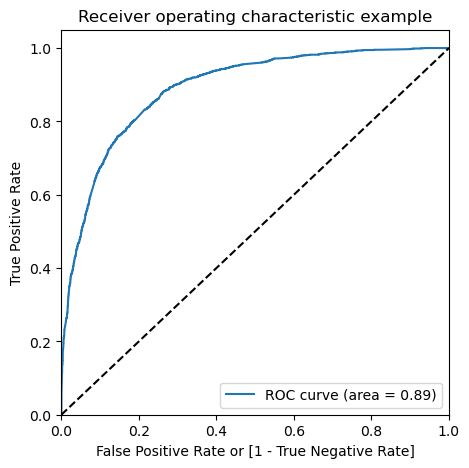

In [106]:
# Call the ROC function
draw_roc(y_train_predicted_final.Converted, y_train_predicted_final.Conversion_Probability)


##### CONCLUSION : The area under ROC curve is 0.87 which is a very good value

In [107]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predicted_final[i]= y_train_predicted_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_predicted_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.992210,1,1,1,1,1,1,1,1,1,1,1
1,1,0.653288,1,1,1,1,1,1,1,1,0,0,0
2,1,0.819048,1,1,1,1,1,1,1,1,1,1,0
3,0,0.868918,1,1,1,1,1,1,1,1,1,1,0
4,0,0.340530,0,1,1,1,1,0,0,0,0,0,0


In [108]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predicted_final.Converted, y_train_predicted_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.382012,1.000000,0.000000
0.1,0.1,0.616215,0.976371,0.393584
0.2,0.2,0.752257,0.923207,0.646583
0.3,0.3,0.792553,0.861603,0.749870
0.4,0.4,0.813024,0.772574,0.838028
0.5,0.5,0.816086,0.706329,0.883933
0.6,0.6,0.808511,0.635443,0.915493
0.7,0.7,0.779981,0.511392,0.946009
0.8,0.8,0.755480,0.410970,0.968440
0.9,0.9,0.713250,0.272996,0.985394


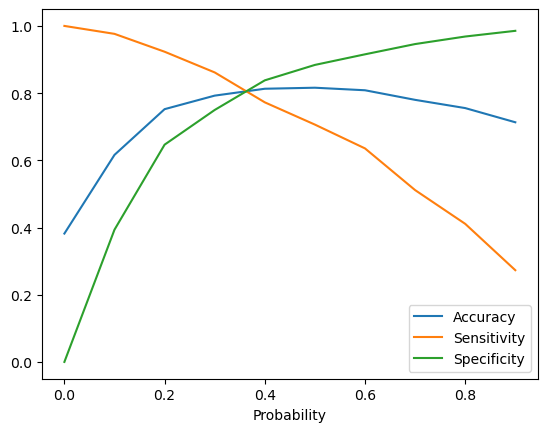

In [109]:
# Plotting it
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

###### From the graph it is visible that the optimal cut off is approximately at 0.35

In [110]:
y_train_predicted_final['Final_Predicted'] = y_train_predicted_final.Conversion_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_predicted_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.992210,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.653288,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.819048,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.868918,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.340530,0,1,1,1,1,0,0,0,0,0,0,0


In [111]:
# Check the overall accuracy
print('Overall Accuracy after optimization : ' , 
      metrics.accuracy_score(y_train_predicted_final.Converted, y_train_predicted_final.Final_Predicted))

Overall Accuracy after optimization :  0.8081882656350742


In [112]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_predicted_final.Converted, y_train_predicted_final.Final_Predicted )
confusion2

array([[3112,  722],
       [ 468, 1902]], dtype=int64)

In [113]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [114]:
# Calculating the sensitivity
print('Overall Sensitivity after optimization : ' , TP/(TP+FN))

Overall Sensitivity after optimization :  0.8025316455696202


In [115]:
# Calculating the specificity
print('Overall Speficity after optimization :' , TN/(TN+FP))

Overall Speficity after optimization : 0.8116849243609807


`With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 81%`

## 9. PREDICTION ON TEST SET

In [116]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [117]:
# Substituting all the columns in the final train model
col = X_train.columns

In [118]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,...,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional
7121,1.0,0.2500,0.467870,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4597,1.0,0.1250,0.189261,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7684,1.0,0.0000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7433,1.0,0.1250,0.827905,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5923,1.0,0.1875,0.175176,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6446,1.0,0.3125,0.079225,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7437,1.0,0.0000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,1.0,0.1250,0.051056,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
779,1.0,0.3750,0.006162,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [119]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_prediction = res_.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_prediction)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,1,0.926423
1,1,0.211498
2,0,0.079553
3,1,0.878854
4,0,0.494848


In [120]:
# Making prediction using cut off 0.35
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Probability,Final_Predicted
0,1,0.926423,1
1,1,0.211498,0
2,0,0.079553,0
3,1,0.878854,1
4,0,0.494848,1
...,...,...,...
2654,0,0.494868,1
2655,0,0.031655,0
2656,0,0.269465,0
2657,0,0.093532,0


In [121]:
# Check the overall accuracy
print('Overall Accuracy on the Test Set : ' , metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Final_Predicted))

Overall Accuracy on the Test Set :  0.8006769462203837


In [122]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Final_Predicted )
confusion2

array([[1354,  324],
       [ 206,  775]], dtype=int64)

In [123]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [124]:
# Calculating the sensitivity
print('Overall Sensitivity on the test set : ' , TP/(TP+FN))

Overall Sensitivity on the test set :  0.7900101936799184


In [125]:
# Calculating the specificity
print('Overall Speficity on the test set: ', TN/(TN+FP))

Overall Speficity on the test set:  0.8069129916567342


`With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%`

## 10. Precision-Recall

In [126]:
confusion = metrics.confusion_matrix(y_train_predicted_final.Converted, y_train_predicted_final.Predicted )
confusion

array([[3389,  445],
       [ 696, 1674]], dtype=int64)

#### Precision talks about all the correct predictions out of total positive predictions.

In [127]:
# Precision = TP / TP + FP
print('Precision : ', confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7899952807928268


#### Recall means how many individuals were classified correctly out of all the actual positive individuals

In [128]:
#Recall = TP / TP + FN
print('Recall: ' , confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall:  0.7063291139240506


`With the current cut off as 0.35 we have Precision around 78% and Recall around 70%`

### Precision and recall tradeoff:

The precision-recall curve is constructed by calculating and plotting the precision against the recall for a single classifier at a variety of thresholds.Based on the requirement of the problem we need to adjust the threshold (or whatever parameters is being used) to get higher precision or recall, at the expense of the other factor.

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
y_train_predicted_final.Converted, y_train_predicted_final.Predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6199    0
 6200    0
 6201    1
 6202    0
 6203    1
 Name: Converted, Length: 6204, dtype: int64,
 0       1
 1       1
 2       1
 3       1
 4       0
        ..
 6199    1
 6200    0
 6201    1
 6202    0
 6203    1
 Name: Predicted, Length: 6204, dtype: int64)

In [131]:
p, r, thresholds = precision_recall_curve(y_train_predicted_final.Converted, y_train_predicted_final.Conversion_Probability)

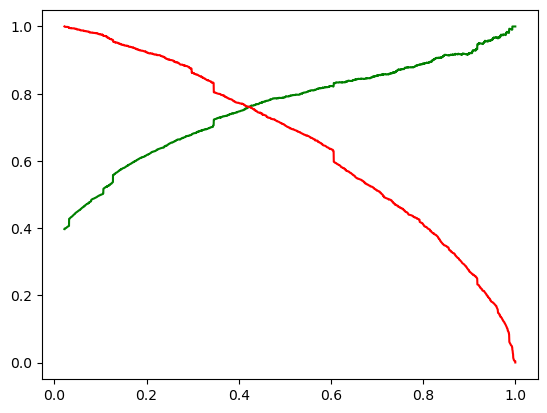

In [132]:
# The Precision Recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

We can see that the threshold cutoff is somewhere around 0.41 or 41%.

In [133]:
y_train_predicted_final['Final_Predicted'] = y_train_predicted_final.Conversion_Probability.map(lambda x: 1 if x > 0.41 else 0)
y_train_predicted_final.head(20)

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.992210,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.653288,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.819048,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.868918,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.340530,0,1,1,1,1,0,0,0,0,0,0,0
5,0,0.045453,0,1,0,0,0,0,0,0,0,0,0,0
6,1,0.828854,1,1,1,1,1,1,1,1,1,1,0,1
7,0,0.050620,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0.245582,0,1,1,1,0,0,0,0,0,0,0,0
9,0,0.314055,0,1,1,1,1,0,0,0,0,0,0,0


In [134]:
# Accuracy
print('Overall Accuracy: ' , metrics.accuracy_score(y_train_predicted_final.Converted, y_train_predicted_final.Final_Predicted))

Overall Accuracy:  0.814474532559639


In [135]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_predicted_final.Converted, y_train_predicted_final.Final_Predicted )
confusion2

array([[3231,  603],
       [ 548, 1822]], dtype=int64)

In [136]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [137]:
# Precision = TP / TP + FP
print('Overall Precision : ' , TP / (TP + FP))

Overall Precision :  0.751340206185567


In [138]:
#Recall = TP / TP + FN
print('Overall Recall : ' , TP / (TP + FN))

Overall Recall :  0.7687763713080169


## 11. Final Prediction on Test set using cutoff

In [139]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res_.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,1,0.926423
1,1,0.211498
2,0,0.079553
3,1,0.878854
4,0,0.494848


In [140]:
# Making prediction using cut off 0.41
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Converted,Conversion_Probability,Final_Predicted
0,1,0.926423,1
1,1,0.211498,0
2,0,0.079553,0
3,1,0.878854,1
4,0,0.494848,1


In [141]:
# Check the overall accuracy
print('Overall Accuracy using 0.41 as the cutoff : ',metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Final_Predicted))

Overall Accuracy using 0.41 as the cutoff :  0.811959383226777


In [142]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Final_Predicted )
confusion2

array([[1426,  252],
       [ 248,  733]], dtype=int64)

In [143]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [144]:
# Precision = TP / TP + FP
print('Overall Precision using 0.41 as the cutoff : ', TP / (TP + FP))

Overall Precision using 0.41 as the cutoff :  0.7441624365482233


In [145]:
#Recall = TP / TP + FN
print('Overall Recall using 0.41 as the cutoff : ' , TP / (TP + FN))

Overall Recall using 0.41 as the cutoff :  0.7471967380224261


## Conclusion from Logistic Regression model (Only)

- `Accuracy`, `Sensitivity` and `Specificity` values of test set are around `81%`, `80%` and `81%` which are approximately closer to the respective values calculated using trained set.
- Also the `lead score` calculated in the `trained set` of data shows the conversion rate on the final predicted model is 
  around `80%`.
- `Hence overall this model seems to be good`
- Also, after analyzing, the following variables(Top 10) were found to be mostly important for getting potential buyers converted:
    - `TotalVisits` : Total number of people who visited the profile
    - `What is your current occupation_housewife` : Visitors who belong to the housewife category
    - `Last Activity_email marked spam` (from Last Activity)
    - `Last Activity_email received` (from Last Activity)
    - `Lead Source_welingak_website` (from Lead Source)
    - `Total Time spent on the website`
    - `Lead Source_reference` (from Lead Source)

### Prediction and Evaluation using XGBoost

In [152]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost model
xgb_model = XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict using the test set
xgb_preds = xgb_model.predict(X_test)

# Evaluate the model's performance
xgb_accuracy = accuracy_score(y_test, xgb_preds)

In [153]:
print("\nXGBoost Model Accuracy: ", xgb_accuracy)


XGBoost Model Accuracy:  0.8213614140654382


In [154]:
print("XGBoost Classification Report: \n", classification_report(y_test, xgb_preds))

XGBoost Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1678
           1       0.77      0.74      0.75       981

    accuracy                           0.82      2659
   macro avg       0.81      0.81      0.81      2659
weighted avg       0.82      0.82      0.82      2659



In [155]:
print("XGBoost Confusion Matrix: \n", confusion_matrix(y_test, xgb_preds))

XGBoost Confusion Matrix: 
 [[1454  224]
 [ 251  730]]


### Prediction and Evaluation using Logistic Regression

In [161]:
# Evaluate the model's performance
lr_accuracy = accuracy_score(y_pred_final['Converted'], y_pred_final.Final_Predicted)

In [159]:
print("\nLogistic Regression Model Accuracy: ", lr_accuracy)


Logistic Regression Model Accuracy:  0.811959383226777


In [160]:
print("Logistic Regression Classification Report: \n", classification_report(y_pred_final['Converted'], y_pred_final.Final_Predicted))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1678
           1       0.74      0.75      0.75       981

    accuracy                           0.81      2659
   macro avg       0.80      0.80      0.80      2659
weighted avg       0.81      0.81      0.81      2659



In [162]:
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_pred_final['Converted'], y_pred_final.Final_Predicted))

Logistic Regression Confusion Matrix: 
 [[1426  252]
 [ 248  733]]


### Prediction and Evaluation using AdaBoost

In [164]:
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

In [167]:
# Initialize the AdaBoost model
ada_model = AdaBoostClassifier()

# Train the AdaBoost model
ada_model.fit(X_train, y_train)

# Predict using the test set
ada_preds = ada_model.predict(X_test)

# Evaluate the model's performance
ada_accuracy = accuracy_score(y_test, ada_preds)
print("\nAdaBoost Model Accuracy: ", ada_accuracy)
print("AdaBoost Classification Report: \n", classification_report(y_test, ada_preds))
print("AdaBoost Confusion Matrix: \n", confusion_matrix(y_test, ada_preds))


AdaBoost Model Accuracy:  0.826250470101542
AdaBoost Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1678
           1       0.78      0.73      0.76       981

    accuracy                           0.83      2659
   macro avg       0.82      0.81      0.81      2659
weighted avg       0.82      0.83      0.83      2659

AdaBoost Confusion Matrix: 
 [[1476  202]
 [ 260  721]]


### Prediction and Evaluation using Catboost

In [165]:
# Initialize the CatBoost model
cat_model = CatBoostClassifier(verbose=0)  # Suppress CatBoost verbose output

# Train the CatBoost model
cat_model.fit(X_train, y_train)

# Predict using the test set
cat_preds = cat_model.predict(X_test)

# Evaluate the model's performance
cat_accuracy = accuracy_score(y_test, cat_preds)
print("\nCatBoost Model Accuracy: ", cat_accuracy)
print("CatBoost Classification Report: \n", classification_report(y_test, cat_preds))
print("CatBoost Confusion Matrix: \n", confusion_matrix(y_test, cat_preds))


CatBoost Model Accuracy:  0.8292591199699135
CatBoost Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1678
           1       0.78      0.75      0.76       981

    accuracy                           0.83      2659
   macro avg       0.82      0.81      0.82      2659
weighted avg       0.83      0.83      0.83      2659

CatBoost Confusion Matrix: 
 [[1470  208]
 [ 246  735]]


## Comparison:

- XGBoost tends to provide better performance due to its ability to handle non-linear relationships and high-dimensional datasets.
- Logistic Regression is a simpler model and may work well with linearly separable data but could struggle with complex patterns
- The best result can be seen by using <b>Catboost</b>,the precision increased from 75% to 78%, hence reducing the false positives and increasing the performance of the model.

- Hence it can be seen that by using the boosting algorithms the performance of the model improves.